## Preprocessing

In [68]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving charity_data.csv to charity_data (1).csv


In [69]:
import io
application_df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [70]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace = True)

In [71]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [72]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df['APPLICATION_TYPE'].value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [73]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_counts[type_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

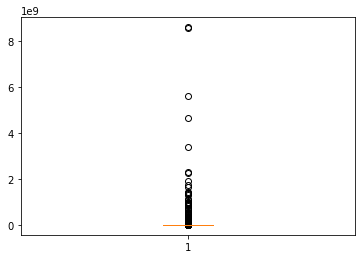

In [74]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

# Look for outliers in ASK_AMT
amts = application_df['ASK_AMT']
fig1, ax1 = plt.subplots()
ax1.boxplot(amts)
plt.show()

In [75]:
amts.sort_values(ascending = False)

33175    8597806340
34222    8556638692
33678    5591584994
24795    4653011914
31337    3391919220
            ...    
13293          5000
13292          5000
13291          5000
13290          5000
17149          5000
Name: ASK_AMT, Length: 34299, dtype: int64

In [76]:
# Remove outliers
application_df = application_df.drop(application_df[application_df.ASK_AMT>2000000].index)


In [77]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

C1000    16588
C2000     5911
C1200     4748
C3000     1890
C2100     1868
         ...  
C2500        1
C1570        1
C1283        1
C2380        1
C2150        1
Name: CLASSIFICATION, Length: 69, dtype: int64

In [78]:
# You may find it helpful to look at CLASSIFICATION value counts >1
over_one = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]
over_one

C1000    16588
C2000     5911
C1200     4748
C3000     1890
C2100     1868
C7000      762
C1700      274
C4000      190
C5000      112
C1270      110
C2700       98
C2800       94
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       31
C7200       30
C1240       30
C7120       18
C8000       18
C1500       15
C6000       14
C1250       14
C1800       13
C1238       10
C1278       10
C8200       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C0           3
C2710        3
C3200        2
C1246        2
C1234        2
C1256        2
C1267        2
Name: CLASSIFICATION, dtype: int64

In [79]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts<500].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    16588
C2000     5911
C1200     4748
C3000     1890
C2100     1868
Other     1440
C7000      762
Name: CLASSIFICATION, dtype: int64

In [80]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [81]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-81-f158e8e70810>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [82]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model for the First Optimization Attempt

In [83]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  88
hidden_nodes_layer2 = 44
# hidden_nodes_layer3 = 22

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 88)                3960      
                                                                 
 dense_52 (Dense)            (None, 44)                3916      
                                                                 
 dense_53 (Dense)            (None, 1)                 45        
                                                                 
Total params: 7,921
Trainable params: 7,921
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5671 - accuracy: 0.7242
Epoch 2/100
779/779 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7293
Epoch 3/100
779/779 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7316
Epoch 4/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7329
Epoch 5/100
779/779 [==============================] - 2s 3ms/step - loss: 0.5468 - accuracy: 0.7321
Epoch 6/100
779/779 [==============================] - 2s 3ms/step - loss: 0.5452 - accuracy: 0.7343
Epoch 7/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.7348
Epoch 8/100
779/779 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7339
Epoch 9/100
779/779 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7350
Epoch 10/100
779/779 [==============================] - 1s 2ms/step - loss: 0.5427 - accura

In [86]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

260/260 - 0s - loss: 0.5654 - accuracy: 0.7362 - 484ms/epoch - 2ms/step
Loss: 0.5653682947158813, Accuracy: 0.7362081408500671


In [87]:
# Mount Google drive in order to create save filepath
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [88]:
# Export our model to HDF5 file
nn.save('/content/gdrive/MyDrive/Colab_Notebooks/Class/Module21-Challenge/Models/AlphabetSoupCharity_Optimization1.h5')

## Compile, Train and Evaluate the Model for the Second Optimization Attempt

In [89]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  135
hidden_nodes_layer2 = 67
hidden_nodes_layer3 = 33

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 135)               6075      
                                                                 
 dense_55 (Dense)            (None, 67)                9112      
                                                                 
 dense_56 (Dense)            (None, 33)                2244      
                                                                 
 dense_57 (Dense)            (None, 1)                 34        
                                                                 
Total params: 17,465
Trainable params: 17,465
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [91]:
# Train the model
fit_model = nn2.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
779/779 [==============================] - 3s 2ms/step - loss: 0.5648 - accuracy: 0.7258
Epoch 2/100
779/779 [==============================] - 2s 3ms/step - loss: 0.5521 - accuracy: 0.7310
Epoch 3/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7344
Epoch 4/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7339
Epoch 5/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7338
Epoch 6/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5443 - accuracy: 0.7356
Epoch 7/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5431 - accuracy: 0.7364
Epoch 8/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5423 - accuracy: 0.7368
Epoch 9/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5423 - accuracy: 0.7358
Epoch 10/100
779/779 [==============================] - 2s 3ms/step - loss: 0.5415 - accura

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

260/260 - 0s - loss: 0.7227 - accuracy: 0.7368 - 355ms/epoch - 1ms/step
Loss: 0.7226701974868774, Accuracy: 0.7368103861808777


In [98]:
# Export our model to HDF5 file
nn2.save('/content/gdrive/MyDrive/Colab_Notebooks/Class/Module21-Challenge/Models/AlphabetSoupCharity_Optimization2.h5')

## Compile, Train and Evaluate the Model for the Third Optimization Attempt

In [107]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  135
hidden_nodes_layer2 = 67
hidden_nodes_layer3 = 33

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 135)               6075      
                                                                 
 dense_71 (Dense)            (None, 67)                9112      
                                                                 
 dense_72 (Dense)            (None, 33)                2244      
                                                                 
 dense_73 (Dense)            (None, 1)                 34        
                                                                 
Total params: 17,465
Trainable params: 17,465
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [109]:
# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
779/779 [==============================] - 3s 2ms/step - loss: 0.5632 - accuracy: 0.7258
Epoch 2/100
779/779 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.7320
Epoch 3/100
779/779 [==============================] - 2s 3ms/step - loss: 0.5481 - accuracy: 0.7321
Epoch 4/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7311
Epoch 5/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7329
Epoch 6/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.7331
Epoch 7/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.7331
Epoch 8/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5430 - accuracy: 0.7357
Epoch 9/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5428 - accuracy: 0.7354
Epoch 10/100
779/779 [==============================] - 2s 3ms/step - loss: 0.5421 - accura

In [110]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

260/260 - 1s - loss: 0.5614 - accuracy: 0.7362 - 524ms/epoch - 2ms/step
Loss: 0.5613627433776855, Accuracy: 0.7362081408500671


In [111]:
# Export our model to HDF5 file
nn3.save('/content/gdrive/MyDrive/Colab_Notebooks/Class/Module21-Challenge/Models/AlphabetSoupCharity_Optimization3.h5')